# Typical Time History for Steam Demand at UIUC

Please see the ``README`` for instructions about accessing the data (UIUC Steam Data is currently not cleared for publication).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Upload data

In [2]:
# define path to data
path = "../../data/" 

In [3]:
# upload datasets
steam15 = pd.read_csv(path+'steamfy15.csv', parse_dates=True, index_col=['Date and Time'])
steam16 = pd.read_csv(path+'steamfy16.csv', parse_dates=True, index_col=['Date and Time'])
steam17 = pd.read_csv(path+'steamfy17.csv', parse_dates=True, index_col=['Date and Time'])
steam18 = pd.read_csv(path+'steamfy18.csv', parse_dates=True, index_col=['Date and Time'])
steam19 = pd.read_csv(path+'steamfy19.csv', parse_dates=True, index_col=['Date and Time'])

## Combine the datasets

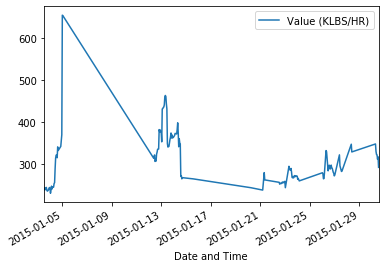

In [4]:
steam15[(steam15['eDNA Status as String'] == 'UNRELIABLE') & (steam15.index.month <= 1)].plot()

In [5]:
frames = [steam15, steam16, steam17, steam18, steam19]

all_data = pd.concat(frames)

# all_data

In [6]:
all_data.head()

,Value (KLBS/HR),eDNA Status as String
Date and Time,,
2014-07-01 00:00:00,105.872467,UNRELIABLE
2014-07-01 01:00:00,104.659416,UNRELIABLE
2014-07-01 02:00:00,105.016411,UNRELIABLE
2014-07-01 03:00:00,106.378754,UNRELIABLE
2014-07-01 04:00:00,106.899544,UNRELIABLE


There is some data marked as 'UNRELIABLE' by eDNA, but it looks mostly okay, except for a couple of days in 2015 that show 0 demand in the winter. We can fix that by interpolating. It looks like the worst data is confined to 2014, which we don't want to use anyway because we can only use complete years of data. 

## Separate the data into complete years

In [7]:
all_data.drop(['eDNA Status as String'], axis=1, inplace=True)

In [8]:
all_data.rename(columns = {'Value (KLBS/HR)':'demand'}, inplace=True)

all_data.head()

,demand
Date and Time,
2014-07-01 00:00:00,105.872467
2014-07-01 01:00:00,104.659416
2014-07-01 02:00:00,105.016411
2014-07-01 03:00:00,106.378754
2014-07-01 04:00:00,106.899544


In [9]:
years = all_data.groupby(all_data.index.year)

steam_data15 = years.get_group(2015)
steam_data16 = years.get_group(2016)
steam_data17 = years.get_group(2017)
steam_data18 = years.get_group(2018)

## Preparing the datasets to be used in RAVEN

This data will be read by RAVEN as HistorySets (a datatype of RAVEN) and will have two columns 

time | demand

where ``time`` is in hours and ``demand`` is in klbs/hr

In [10]:
%%capture
steam_data15.reset_index(inplace=True)
steam_data15['time'] = steam_data15.index
steam_data15.drop(['Date and Time'], axis=1, inplace=True)
steam_data15.head()

In [11]:
%%capture
steam_data16.reset_index(inplace=True)
steam_data16['time'] = steam_data16.index
steam_data16.drop(['Date and Time'], axis=1, inplace=True)
steam_data16 = steam_data16[:8760]
steam_data16.head()

In [12]:
%%capture
steam_data17.reset_index(inplace=True)
steam_data17['time'] = steam_data17.index
steam_data17.drop(['Date and Time'], axis=1, inplace=True)
steam_data17.head()

In [13]:
%%capture
steam_data18.reset_index(inplace=True)
steam_data18['time'] = steam_data18.index
steam_data18.drop(['Date and Time'], axis=1, inplace=True)
steam_data18.head()

## Download the RAVEN datasets

In [14]:
# writes the header file for RAVEN
fname = 'annual_steam201'
keys = [fname + str(i) + '.csv' for i in range(5,9,1)]
header_file = pd.DataFrame({'scaling':np.zeros(len(keys), dtype=np.int8), 'filename':keys})
header_file.to_csv(path+'annual_steam_H.csv')
print(keys)

['annual_steam2015.csv', 'annual_steam2016.csv', 'annual_steam2017.csv', 'annual_steam2018.csv']


In [15]:
steam_data15.to_csv(path+'annual_steam2015.csv')
steam_data16.to_csv(path+'annual_steam2016.csv')
steam_data17.to_csv(path+'annual_steam2017.csv')
steam_data18.to_csv(path+'annual_steam2018.csv')

In [16]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/typical_steam.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

(    0.05 sec) HistorySet               : DEBUG           -> Reading data from "/home/dotson/Research/data/annual_steam2018.csv.csv"
(    0.06 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.06 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.06 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.06 sec) SIMULATION               : Message         -> -- End step read of type: IOStep                               --

(    0.06 sec) SIMULATION               : Message         -> -- Beginning step get_history of type: PostProcess                  --
(    0.06 sec) STEP SINGLERUN           : Message         -> ***  Beginning initialization ***
(    0.06 sec) STEP SINGLERUN           : DEBUG           -> jobHandler initialized
(    0.06 sec) STEP SINGLERUN           : DEBUG           -> for the role Model  the item of class PostProcessor   and name typicalHistory  has

(    0.23 sec) HistorySet               : DEBUG           -> Printing metadata XML: "TypicalSteam.xml"
(    0.23 sec) STEP IOCOMBINED          : Message         -> ***       Run finished        ***
(    0.23 sec) STEP IOCOMBINED          : Message         -> ***     Closing the step      ***
(    0.23 sec) STEP IOCOMBINED          : Message         -> ***        Step closed        ***
(    0.23 sec) SIMULATION               : Message         -> -- End step write of type: IOStep                              --

--------------------------------------------------
There were 1 warnings during the simulation run:
(1 time) DataObject._convertToDict can be a slow operation and should be avoided where possible!
--------------------------------------------------
(    0.23 sec) SIMULATION               : Message         -> Run complete!


In [40]:
typical_steam = pd.read_csv(path+"TypicalSteam_0.csv")

typical_steam['date'] = pd.date_range(start='1/1/2018', end='1/1/2019', freq='H')[:8760]

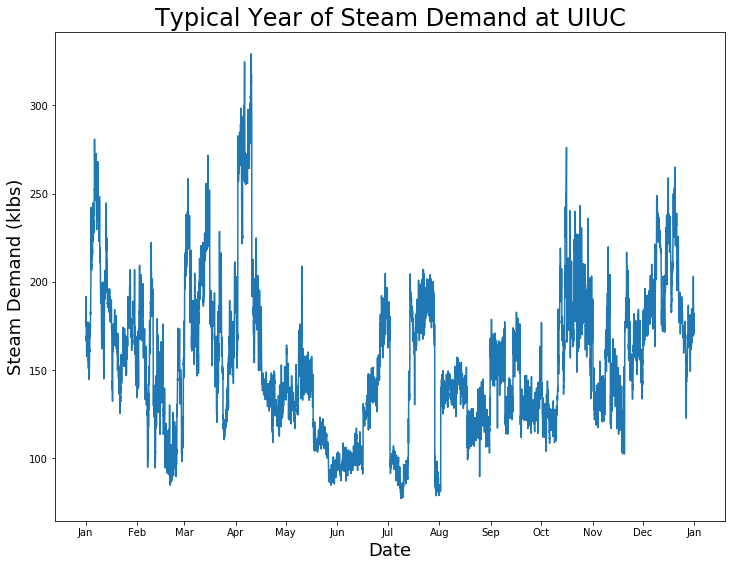

In [41]:
import matplotlib.dates as mdates


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig = plt.figure(figsize=(12,9), edgecolor='k', facecolor='w')
plt.plot(typical_steam.date, typical_steam.demand)
plt.title('Typical Year of Steam Demand at UIUC', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Steam Demand (klbs)',fontsize=18)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

### Generate Synthetic Histories

After the synthetic histories (which give flow rates) have been generated, we can calculate the MWth demand.

It makes more sense to convert to thermal demand before generating the synthetic histories. Why do something more than once if you don't have to?

We use the equation

$P_{th} = \dot{Q} = \dot{m}c_p\Delta T$. 

This equation gives the thermal power required to heat a certain amount of water to a certain temperature. 

At 120$^\circ$C the $c_p$ of water is 4243.5 [J/kg K]

$\Delta T$ is 179$^\circ$C

In [42]:
# define conversion function
cp = 4243.5 # J/kg K
dT = 179 # deg C

# times 1000 to convert klbs to lbs
# divide by 2.205 to convert lbs to kgs
# divide by 1e+6 to convert joules to megajoules
# divide by 3600 to convert kpph to kpps
to_mwth = lambda mdot: (((mdot*1000/2.205)*cp*dT)*1e-6)/3600

In [43]:
steam_data17

,demand,time
0,176.952080,0
1,176.582175,1
2,175.337189,2
3,179.603761,3
4,174.753566,4
...,...,...
8755,301.796244,8755
8756,299.892668,8756
8757,301.247598,8757
8758,307.970488,8758


In [38]:
typical_steam = typical_steam[['time','demand']]

In [44]:
typical_steam = typical_steam.demand.apply(to_mwth)
typical_steam

0       16.932528
1       16.897132
2       16.778000
3       17.186268
4       16.722153
          ...    
8755    17.126240
8756    16.749003
8757    17.004272
8758    16.567458
8759    16.501438
Name: demand, Length: 8760, dtype: float64

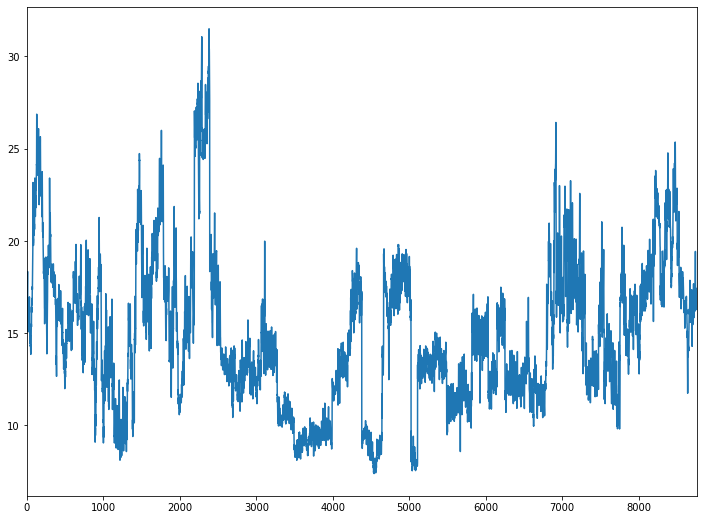

In [45]:
typical_steam.plot(figsize=(12,9))

In [21]:
typical_steam
typical_steam.to_csv(path+"TypicalSteam_0.csv")

In [22]:
!~/Research/raven/raven_framework ~/Research/2020-dotson-optimal-sizing/inputfiles/steam_arma.xml

CONDA
raven_libraries          /home/dotson/anaconda3/envs/raven_libraries
Running RAVEN in "opt" mode.
/home/dotson/Research/raven/framework/utils/utils.py:579: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp, os.path
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/statsmodels/base/wrapper.py:100: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  defaults=argspec[3])
/home/dotson/anaconda3/envs/raven_libraries/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'colle

In [23]:
path = '../../data/'
synthetic_history = pd.read_csv(path+"generationHistories_2.csv")